__ROI Overlap Notebook:__

This notebook explored the ways that pyhton can be used to track the overlap of Regions Of Interest in an Image

__Setup:__ We begin by importing all of our packages and loading the image data.

In [94]:
import skimage 
import cv2 as cv
from skimage import data, io, filters, measure
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize
from PIL import Image
import numpy as np

Cell:


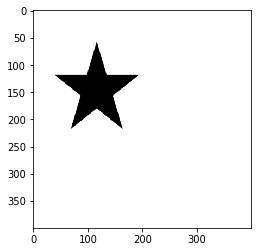

Protien:


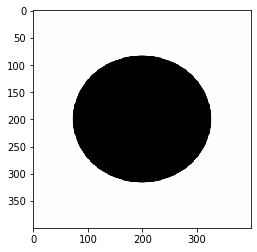

In [95]:
cell = io.imread("Cell.png")
cell = resize(cell, (400,400))
protien = io.imread("Protien.png")
protien = resize(protien, (400,400))
print("Cell:")
plt.imshow(cell)
plt.show()
print("Protien:")
plt.imshow(protien)
plt.show()

__Analysis__: The goal is to determine what percentage of the Cell overlaps with the Protien, and the first step is to get a third image that just contains the overlapping region

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


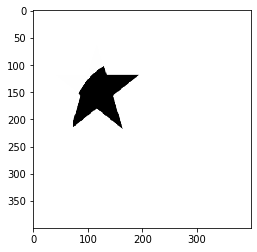

In [96]:
overlap = protien + cell
#print(overlap)
plt.imshow(overlap)
plt.show()

*While this is the desired result, but the pixel values are all messed up now.  Getting this subsection is not a clean procedure without bitwise operations*

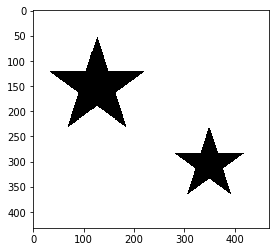

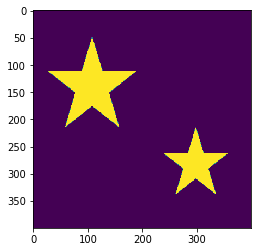

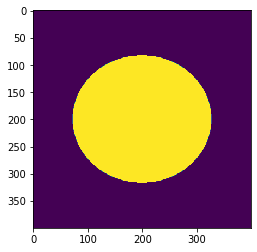

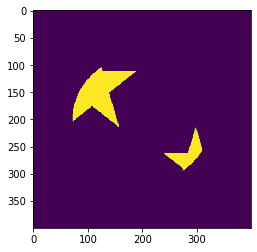

In [97]:
cell2 = cv.imread("doubleCell.png")
gray = cv.cvtColor(cell2, cv.COLOR_BGR2GRAY)
ret, cellG = cv.threshold(gray, 254, 255, 0)
plt.imshow(cellG, cmap = 'Greys_r')
plt.show()
protien2 = cv.imread("Protien.png")
grayP = cv.cvtColor(protien2, cv.COLOR_BGR2GRAY)
ret, protienG = cv.threshold(grayP, 254, 255, 0)
dim = (400,400)
cellG = cv.resize(cellG,dim)
protienG = cv.resize(protienG,dim)
not_cell = cv.bitwise_not(cellG)
not_protien = cv.bitwise_not(protienG)
over = cv.bitwise_and(not_cell,not_protien)
plt.imshow(not_cell)
plt.show()
plt.imshow(not_protien)
plt.show()
plt.imshow(over)
plt.show()

*Using OpenCV we can resize the images without messing up the pixel values, it also has bitwise opperations so we can get the cross section with an "and" opperation.  Needed to invert my original image because we need the true values to be the cell and the protien for when we do the "and"*

__Next step is measuring area__

In [98]:
#full_cell = Image.fromarray(not_cell)
#overlap = Image.fromarray(over)
#white_full = 0
#white_over = 0
#for pixel in full_cell.getdata():
#    if pixel == (255, 255, 255):
#        white_full += 1
#for pixel in overlap.getdata():
#    if pixel == (255, 255, 255):
#        white_over += 1
#coverage = white_over/white_full
#print(coverage)

Now we can see that 75% of the cell is overlapping with the protien

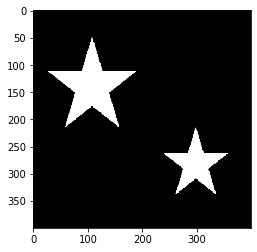

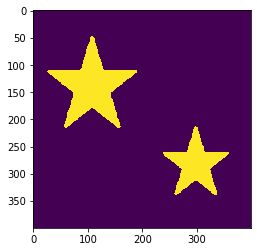

In [99]:
white_cell =not_cell.copy()
#cell_gray = cv.cvtColor(white_cell, cv.COLOR_BGR2GRAY)
#ret, thresh = cv.threshold(cell_gray, 127, 255, 0)
plt.imshow(not_cell, cmap = 'Greys_r')
plt.show()
contours, hierarchy = cv.findContours(white_cell,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
cv.drawContours(not_cell, contours, -1, (255,0,0), 3)
plt.imshow(not_cell)
plt.show()
white_protien =not_protien.copy()
#protien_gray = cv.cvtColor(white_protien, cv.COLOR_BGR2GRAY)
#___, threshP = cv.threshold(protien_gray, 127, 255, 0)
contoursP, ____ = cv.findContours(white_protien,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
#cv.drawContours(not_protien, contoursP, -1, (255,0,0), 3)
#plt.imshow(not_protien)
#plt.show()

Here we can find the contour we need for 

In [100]:
for cntr in contours:
    test_protien = not_protien.copy()
    cv.fillPoly(test_protien, cntr, color=(255,255,255))
    #test_gray = cv.cvtColor(test_protien, cv.COLOR_BGR2GRAY)
    #plt.imshow(test_protien, cmap = 'Greys_r')
    #plt.show()
    #___, threshTest = cv.threshold(test_gray, 127, 255, 0)
    contoursTest, ____ = cv.findContours(test_protien,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
    cv.drawContours(test_protien, contoursTest, -1, (0,255,0), 3)
    #plt.imshow(test_protien)
    #plt.show()
    overlap = cv.contourArea(contoursTest[0]) - cv.contourArea(contoursP[0]) 
    M = cv.moments(cntr)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    center = (cx,cy)
    area = 1-overlap/cv.contourArea(cntr)
    print((center,area))


((298, 282), 0.3681094324213965)
((108, 140), 0.6211117349803481)
